<a href="https://colab.research.google.com/github/jtneumann/DL-Basketball/blob/master/BS_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the Google Colab Notebook

In [1]:
import sys
print(sys.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [2]:
import numpy as np
print(np.__version__)

1.18.5


In [3]:
import pandas as pd
print(pd.__version__)

1.0.5


In [4]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [5]:
import pandas as pd
import random

df = pd.DataFrame(
    {'Date': pd.period_range('1/1/2018', freq='M', periods=36),
     'Home': [random.randint(1,100) for x in range(36) ],
     'Away': [random.randint(1,100) for x in range(36) ],
     'Result': [-1 for x in range(36)]
     })


In [6]:
df['Result'] = df['Home'] - df['Away']
df.head()

,Date,Home,Away,Result
0,2018-01,65,57,8
1,2018-02,54,3,51
2,2018-03,78,81,-3
3,2018-04,67,53,14
4,2018-05,96,49,47


In [7]:
df2018 = df[ df['Date'] < '2109-1-1' ].copy()
df2019 = df[ (df['Date'] > '2018-12-31') & (df['Date'] < '2020-1-1')].copy()
df2020 = df[ (df['Date'] > '2019-12-31') & (df['Date'] < '2021-1-1')].copy()


In [8]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, input_shape=[1])
)
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(0.1))

In [9]:
celsius = np.array([], float)
fahrenheit = np.array([], float)
for i in range(0, 100, 5):
    celsius = np.append(celsius, i)
    fahrenheit = np.append(fahrenheit, i * 1.8 + 32 )

print(celsius)
print(fahrenheit)


[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.
 90. 95.]
[ 32.  41.  50.  59.  68.  77.  86.  95. 104. 113. 122. 131. 140. 149.
 158. 167. 176. 185. 194. 203.]


In [10]:
history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)


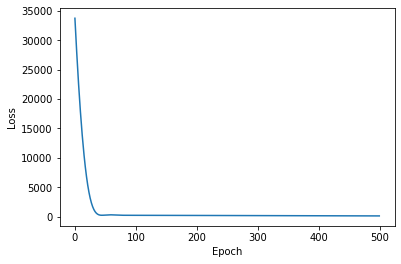

In [11]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

In [12]:
print('5 * 1.8 + 32 = 41')
print(model.predict([5]))
print('99 * 1.8 + 32 = 210.2')
print(model.predict([99]))

5 * 1.8 + 32 = 41
[[22.37925]]
99 * 1.8 + 32 = 210.2
[[220.91035]]


In [13]:
print("This is the weight that should be close to the *1.8 in the formula: {}".format( model.layers[0].get_weights()[0][0] ))
print("This is the bias that should be close to the +32 in the formula: {}".format( model.layers[0].get_weights()[1] ))


This is the weight that should be close to the *1.8 in the formula: [2.112033]
This is the bias that should be close to the +32 in the formula: [11.819086]
